# Pandas intro

* https://pandas.pydata.org/

In [1]:
import pandas as pd
pd.__version__

'0.24.2'

In [2]:
import numpy as np
np.__version__

'1.16.4'

## Series

In [3]:
# list of 1-d data
s1 = pd.Series([10,20,30])

In [4]:
type(s1)

pandas.core.series.Series

In [5]:
# each entry has an index, if not specified just consecutively numbered  
s1

0    10
1    20
2    30
dtype: int64

In [6]:
# you can also specify the index, either in paris of name/value
s2 = pd.Series({'a' : 10, 'b' : 20, 'c' : 30})
s2

a    10
b    20
c    30
dtype: int64

In [7]:
# or as an additional parameter
s3 = pd.Series([10,20,30], index=['a', 'b', 'c'])
s3

a    10
b    20
c    30
dtype: int64

In [8]:
# []-operator either gets by position 
s3[0]

10

In [9]:
# or index
s3['a']

10

In [10]:
# you can also make that explicit
s3.loc['a']

10

In [11]:
s3.iloc[0]

10

In [12]:
# more than one index is possible
s3[['a', 'c']]

a    10
c    30
dtype: int64

In [13]:
# ranges are separated with a colon, start is inclusive, end exclusive
s3[0:2]

a    10
b    20
dtype: int64

In [14]:
# start 0 is implicit and can be left out
s3[:2]

a    10
b    20
dtype: int64

In [15]:
# end is optional, gets you all values from start
s3[1:]

b    20
c    30
dtype: int64

### Advanced Series

In [16]:
# you can pass a boolean function make selection as complex as you want 
s3[lambda value: value >= 20]

b    20
c    30
dtype: int64

In [17]:
# if you want to understand how this is possible:
# Python allows for operator overloading which has been done for Series and DataFrames
# in this case the []-operator is overloaded
# http://stackoverflow.com/questions/1957780/how-to-override-operator

# here a very simple example how to do this
class MyClass:
    def __getitem__(self, key):
        return key * 2
myobj = MyClass()
myobj[3]

6

### Dataframes

In [18]:
# a dataframe consists of Series, typically, but not necessarily, they will have the same index

df1 = pd.DataFrame(
    {'one': pd.Series([10,20,30], index=['a', 'b', 'c']),
     'two': pd.Series([100,200,300], index=['a', 'b', 'c'])
    })

In [19]:
type(df1)

pandas.core.frame.DataFrame

In [20]:
df1.head()

,one,two
a,10,100
b,20,200
c,30,300


In [21]:
df1.describe()

,one,two
count,3.0,3.0
mean,20.0,200.0
std,10.0,100.0
min,10.0,100.0
25%,15.0,150.0
50%,20.0,200.0
75%,25.0,250.0
max,30.0,300.0


In [22]:
# Series can be accessed by their labels

s4 = df1['one']

In [23]:
type(s4)

pandas.core.series.Series

In [24]:
s4['a']

10

In [25]:
df1['one']['a']

10

## Data Cleaning

Using the tranditional iris dataset as an example

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/data/iris_dirty.csv',
                 header=None,
                 encoding='iso-8859-15',
                 names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [27]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [28]:
df.count()

sepal length    151
sepal width     150
petal length    151
petal width     151
class           151
dtype: int64

In [29]:
df.describe()

,sepal length,sepal width,petal length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


### Finding and fixing missing data

In [30]:
df['sepal width'].isna()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
Name: sepal width, Length: 151, dtype: bool

In [31]:
df[df['sepal width'].isna()]

,sepal length,sepal width,petal length,petal width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [32]:
iris_versicolor = df[df['class']  == 'Iris-versicolor']
iris_versicolor

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,14 mm,Iris-versicolor
51,6.4,3.2,4.5,15 mm,Iris-versicolor
52,6.9,3.1,4.9,15 mm,Iris-versicolor
53,5.5,2.3,4.0,13 mm,Iris-versicolor
54,6.5,2.8,4.6,15 mm,Iris-versicolor
55,5.7,2.8,4.5,13 mm,Iris-versicolor
56,6.3,3.3,4.7,16 mm,Iris-versicolor
57,4.9,2.4,3.3,10 mm,Iris-versicolor
58,6.6,2.9,4.6,13 mm,Iris-versicolor
59,5.2,2.7,3.9,14 mm,Iris-versicolor


In [33]:
iris_versicolor_sepal_width = iris_versicolor['sepal width']
iris_versicolor_sepal_width

50     3.2
51     3.2
52     3.1
53     2.3
54     2.8
55     2.8
56     3.3
57     2.4
58     2.9
59     2.7
60     2.0
61     3.0
62     2.2
63     2.9
64     2.9
65     3.1
66     3.0
67     2.7
68     2.2
69     2.5
70     3.2
71     2.8
72     2.5
73     2.8
74     2.9
75     3.0
76     2.8
77     3.0
78     2.9
79     2.6
80     2.4
81     2.4
82     NaN
83     2.7
84     3.0
85     3.4
86     3.1
87     2.3
88     3.0
89     2.5
90     2.6
91     3.0
92     2.6
93     2.3
94     2.7
95     3.0
96     2.9
97     2.9
98     2.5
99     2.8
100    3.2
Name: sepal width, dtype: float64

In [34]:
meanSepalWidth = iris_versicolor_sepal_width.mean()
meanSepalWidth

2.7800000000000007

In [35]:
df.loc[82]

sepal length                5.8
sepal width                 NaN
petal length                3.9
petal width               12 mm
class           Iris-versicolor
Name: 82, dtype: object

In [36]:
df.loc[82,'sepal width'] = meanSepalWidth
df.loc[82]

sepal length                5.8
sepal width                2.78
petal length                3.9
petal width               12 mm
class           Iris-versicolor
Name: 82, dtype: object

In [37]:
df.count()

sepal length    151
sepal width     151
petal length    151
petal width     151
class           151
dtype: int64

### Finding and erasing duplicates

In [38]:
df[df.duplicated(keep=False)]

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,1 mm,Iris-setosa
34,4.9,3.1,1.5,1 mm,Iris-setosa
37,4.9,3.1,1.5,1 mm,Iris-setosa
50,7.0,3.2,4.7,14 mm,Iris-versicolor
100,7.0,3.2,4.7,14 mm,Iris-versicolor


In [39]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,51,51,51,51
Iris-virginica,50,50,50,50


In [40]:
df = df.drop(df.index[[100]])

In [41]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [42]:
df[df['class']  == 'Iris-setsoa']

,sepal length,sepal width,petal length,petal width,class
49,5.0,3.3,1.4,2 mm,Iris-setsoa


In [43]:
df.loc[49,'class'] = 'Iris-setosa'

In [44]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Unifying units

In [45]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [46]:
pd.to_numeric('2 mm'.replace(' mm', '')) / 10

0.2

In [47]:
def convert_from_mm(row):
    return pd.to_numeric(row['petal width'].replace(' mm', '')) / 10

df['petal width'] = df.apply(convert_from_mm, axis='columns')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Outlier

In [48]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,6.191333,3.054533,3.758667,1.198667
std,4.338310,0.433205,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


In [49]:
df.groupby('class').describe()

sepal length                                              \
                       count   mean       std  min  25%  50%   75%   max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.8  5.0  5.20   5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.6  5.9  6.30   7.0   
Iris-virginica          50.0  7.632  7.295356  4.9  6.3  6.5  7.05  58.0   

                sepal width          ... petal length      petal width         \
                      count    mean  ...          75%  max       count   mean   
class                                ...                                        
Iris-setosa            50.0  3.4180  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.7716  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.9740  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

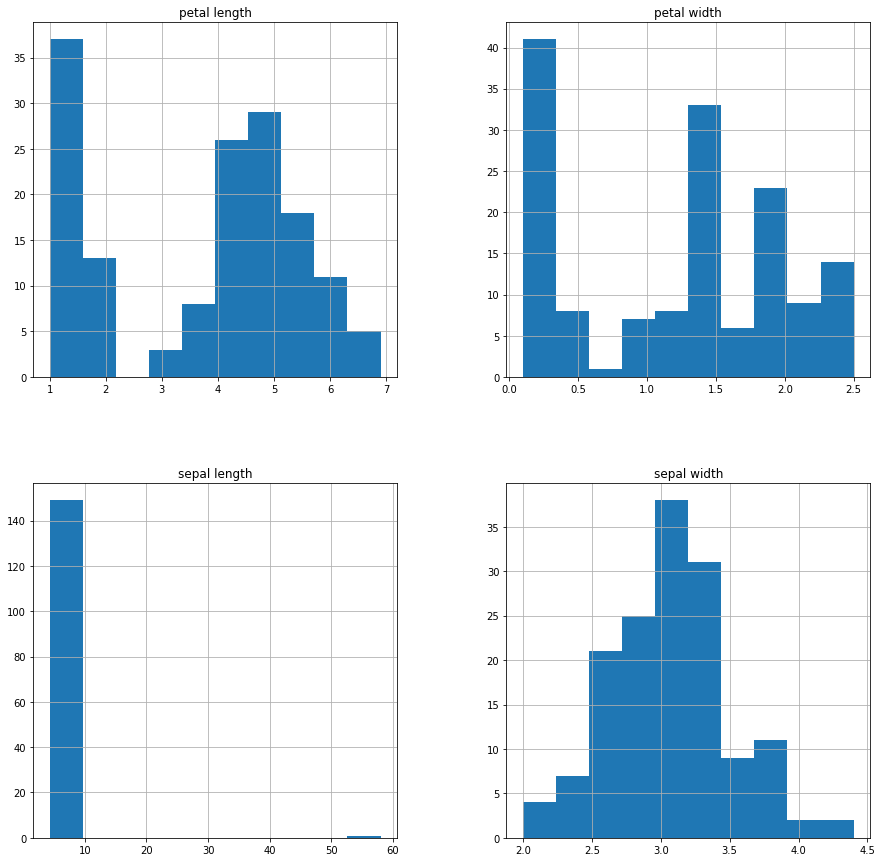

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt

plots = df.hist(figsize=(15, 15))

In [54]:
df[df['sepal length'] == 58]

,sepal length,sepal width,petal length,petal width,class
143,58.0,2.7,5.1,1.9,Iris-virginica


In [55]:
df.loc[143,'sepal length'] = 5.8

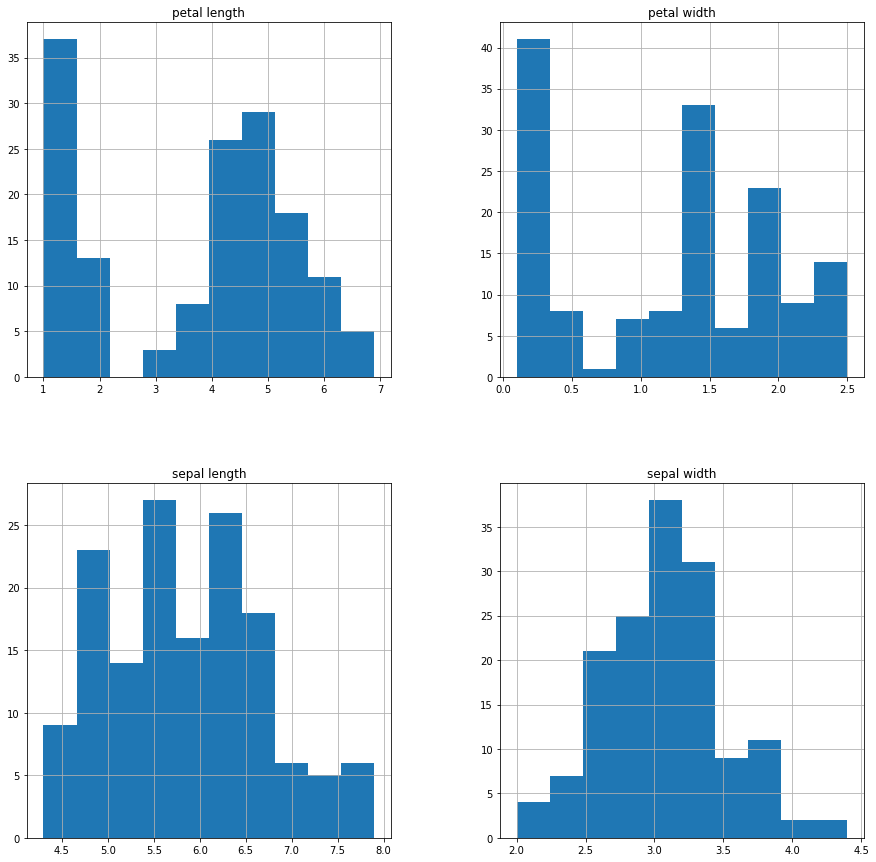

In [56]:
plots = df.hist(figsize=(15, 15))